In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

In [19]:
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df = df.drop(columns=["CustomerID","Gender","Age"])

In [9]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
df = df.rename(columns = {"Annual Income (k$)":"income","Spending Score (1-100)":"spending"})

In [12]:
df.head()

,income,spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


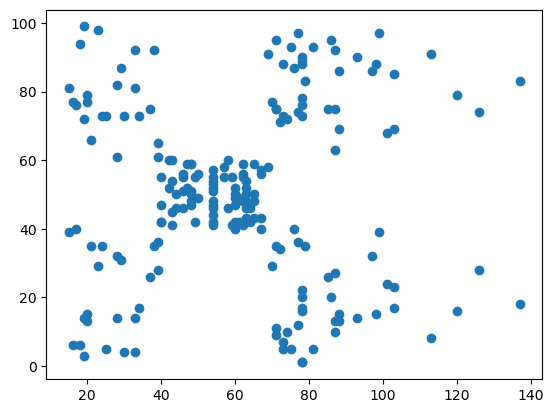

In [14]:
plt.scatter(df.income,df.spending)

In [16]:
x = df[['income','spending']]

In [20]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow method')

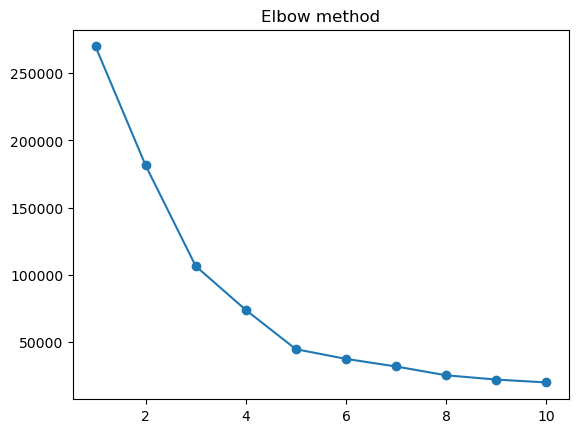

In [21]:
plt.plot(range(1,11),wcss,marker = 'o')
plt.title("Elbow method")

In [22]:
cluster_size = 5

In [29]:
kmeans = KMeans(n_clusters = 5 )

In [30]:
cluster = kmeans.fit_predict(x)

In [31]:
df['cluster'] = cluster

In [32]:
df.head()

,income,spending,cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


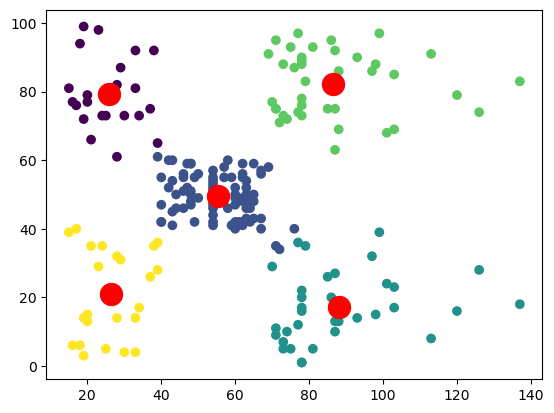

In [47]:
plt.scatter(df.income , df.spending , c= cluster , cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'red' , s =250 )
plt.show()